In [2]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import matplotlib
import numpy as np

In [3]:
dataset = pd.read_pickle('../../geodata/results/01_master_building_dataset.pkl')


In [3]:
maxvsh_cols = dataset.columns[dataset.columns.str.contains('maxvsh')]

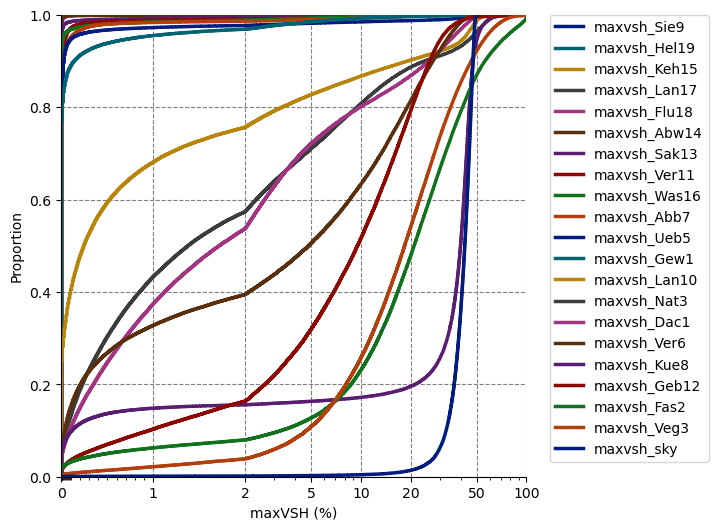

In [4]:
dat = dataset[maxvsh_cols].sample(100000).melt()

plt.figure(figsize = (6,6))
ordr_lst = dat.groupby('variable')['value'].apply(lambda x: stats.percentileofscore(x,1)).sort_values(ascending = True).index.tolist()
ax = sns.ecdfplot(data = dat, x = 'value', hue = 'variable', hue_order = ordr_lst, palette = 'dark', legend = True, linewidth=2.5)

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels = ordr_lst[::-1])
plt.xlim((0,100))
plt.xlabel('maxVSH (%)')
plt.xscale('symlog')
ax.set_xticks([0,1,2,5,10,20,50,100])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

y_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
ax.xaxis.set_minor_locator(y_minor)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.xaxis.grid(color='gray', linestyle='dashed')

sns.despine()

# plt.savefig('../../vc_plots/fig1_ch_maxvsh_ecdf.svg')

In [5]:
vaccess_cols = dataset.columns[dataset.columns.str.contains('vwa')]

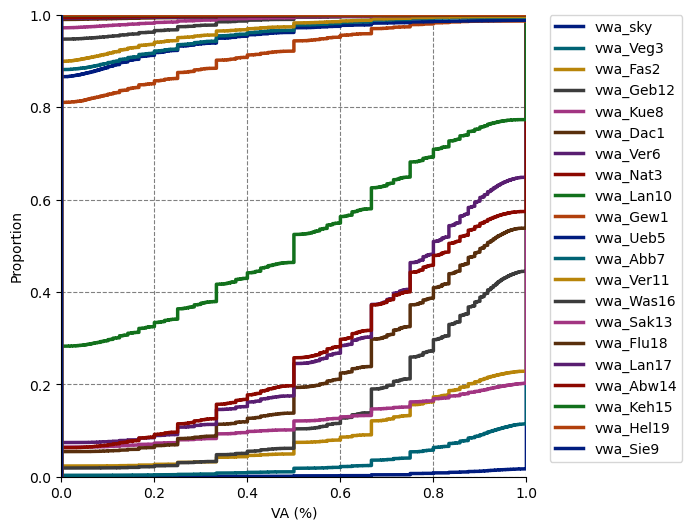

In [6]:
dat = (dataset[vaccess_cols]).sample(50000).melt()

plt.figure(figsize = (6,6))
ordr_lst = dat.groupby('variable')['value'].apply(lambda x: stats.percentileofscore(x,.5)).sort_values(ascending = False).index.tolist()
ax = sns.ecdfplot(data = dat, x = 'value', hue = 'variable', hue_order = ordr_lst, palette = 'dark', legend = True, linewidth=2.5)

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels = ordr_lst[::-1])
plt.xlim((0,1))
plt.xlabel('VA (%)')
# plt.xscale('symlog')
# ax.set_xticks([0,1,2,5,10,20,50,100])
# ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

# y_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
# ax.xaxis.set_minor_locator(y_minor)
# ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.xaxis.grid(color='gray', linestyle='dashed')

sns.despine()

# plt.savefig('../../vc_plots/ch_va_ecdf.svg')